# Joint analysis of 10x Visium mouse brain slices

In this tutorial, we demonstrate SpaRCL on the joint analysis of 10x Visium mouse brain serial section 1 (sagittal anterior and posterior) slices including

* Relational contrastive learning
* Spatial domain identification
* Spatial subdomain identification

The datasets are available at [10x genomics website](https://www.10xgenomics.com/resources/datasets) (Spatial Gene Expression >> Visium Demonstration (v1 Chemistry) >> Space Ranger 1.1.0 >> Mouse Brain Serial Section 1 (Sagittal-Anterior) & Mouse Brain Serial Section 1 (Sagittal-Posterior)).

We concatenated the images and expression and modified the spatial coordinates to merge two datasets.

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

import SpaRCL as rcl

## Data loading and preprocessing

We load the merged dataset and perform preprocessing including finding top 2000 highly variable genes and log transformation.

In [2]:
adata = sc.read_h5ad('./data/Mouse_Brain_Sagittal.h5ad')
adata

AnnData object with n_obs × n_vars = 6050 × 32285
    obs: 'in_tissue', 'array_row', 'array_col', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [3]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, flavor='seurat_v3')
sc.pp.log1p(adata)

## Relational contrastive learning

We perform relational contrastive learning on the preprocessed data.

In [4]:
rcl.run_RCL(adata)

 78%|██████████████████████████████████████▉           | 779/1000 [11:40<03:18,  1.11it/s, err=9.92849e-06, converged!]


## Spatial domain identification

We identify spatial domians using the relation matrix.

In [5]:
sc.tl.leiden(adata, resolution=3, neighbors_key='relation')

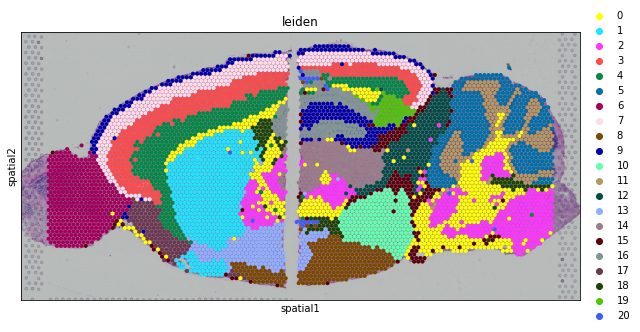

In [6]:
fig, axs = plt.subplots(figsize=(9, 5))

sc.pl.spatial(
    adata,
    img_key='hires',
    color='leiden',
    size=1.5,
    palette=sc.pl.palettes.default_102,
    legend_loc='right margin',
    show=False,
    ax=axs,
)

axs.legend(
    frameon=False,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    ncol=1,
    fontsize=None,
)

plt.tight_layout()

## Spatial subdomain identification

We subset the domain of interest and identify subdomains using the relation matrix subset.

In [7]:
adata_subset = adata[adata.obs['leiden']=='16',:]
adata_subset

View of AnnData object with n_obs × n_vars = 174 × 32285
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p', 'relation', 'leiden', 'leiden_colors'
    obsm: 'spatial'
    obsp: 'relation'

In [8]:
sc.tl.leiden(adata_subset, resolution=0.5, neighbors_key='relation')

Trying to set attribute `.obs` of view, copying.


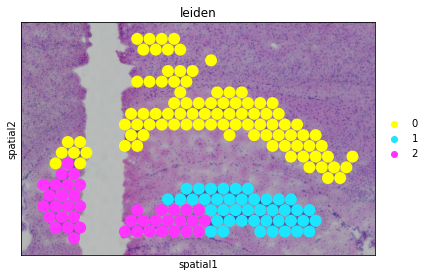

In [9]:
fig, axs = plt.subplots(figsize=(6, 4))

sc.pl.spatial(
    adata_subset,
    img_key='hires',
    color='leiden',
    size=1.5,
    palette=sc.pl.palettes.default_102,
    legend_loc='right margin',
    show=False,
    ax=axs,
)

plt.tight_layout()